<a href="https://colab.research.google.com/github/Neetha13ie/VaticanCameos/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
import os
os.environ['KAGGLE_USERNAME']='neethaieappen'
os.environ['KAGGLE_KEY'] = '727681da3426148d99fda1c6bd27a5db'

In [4]:
! kaggle datasets download -d 'rohanrao/nifty50-stock-market-data'

 81% 15.0M/18.4M [00:01<00:00, 22.3MB/s]
100% 18.4M/18.4M [00:01<00:00, 18.1MB/s]


In [5]:
! unzip '/content/nifty50-stock-market-data.zip'

Archive:  /content/nifty50-stock-market-data.zip
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.csv            
  inflating: INFY.csv                
 

In [36]:
df = pd.read_csv('/content/ADANIPORTS.csv')

In [7]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [8]:
df.shape

(3322, 15)

In [9]:
df.isna().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [37]:
df.dropna(axis=1,inplace=True)

In [12]:
df.isna().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [13]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,816123,0.2741


In [38]:
X = df[['Prev Close','Open','High','Low','Last']]
y = df['Close']

In [23]:
X

,Prev Close,Open,High,Low,Last
0,440.00,770.00,1050.00,770.00,959.0
1,962.90,984.00,990.00,874.00,885.0
2,893.90,909.00,914.75,841.00,887.0
3,884.20,890.00,958.00,890.00,929.0
4,921.55,939.75,995.00,922.00,980.0
...,...,...,...,...,...
3317,725.35,733.00,739.65,728.90,729.2
3318,730.75,735.00,757.50,727.35,748.6
3319,749.15,755.00,760.00,741.10,743.4
3320,746.25,753.20,765.85,743.40,746.4


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [31]:
X_test.shape

(831, 5)

In [40]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = classifier.predict(X_test)

In [34]:
print({'actual': y_test, 'predicted': y_pred})

{'actual': 1201    125.50
583     756.10
3223    453.70
3044    260.40
3295    686.25
         ...  
2574    386.35
283     369.10
420     541.95
193     580.15
91      597.75
Name: Close, Length: 831, dtype: float64, 'predicted': array([ 125.48720182,  757.56397905,  456.51893083,  259.42981211,
        686.08875044,  413.16571084,  381.03510467,  397.81502254,
        368.51031479,  154.07556893,  185.76361512,  414.08471068,
        405.81698263,  742.21741518,  144.86372761,  346.42915359,
        115.02269408,  391.28371677,  241.43681726,  329.15649578,
        301.26360981,  324.96917934,  266.78843903,  548.36783304,
        146.43179609,  139.53944441,  206.23613896,  834.15447484,
        264.50408624,  316.33508166,  154.43822923,  146.82487303,
        153.17968393,  186.98016553, 1037.07520392,  524.12694074,
       1265.64689193,  146.70831018,  318.35592389,  400.37479858,
        538.24144918,  376.78205217,  369.57501368,  134.59342722,
        324.97534325,  291.50854

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2.3163034914700815

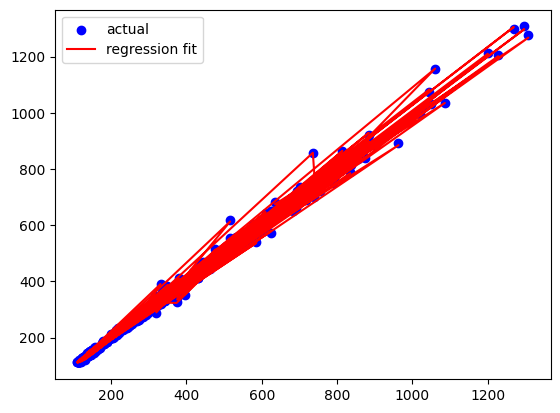

In [48]:
plt.scatter(X_test['Prev Close'],y_test,color='blue',label='actual')
plt.plot(X_test['Prev Close'],y_pred,color = 'red', label='regression fit')
plt.legend()
plt.show()

Text(0.5, 0, 'y_test')

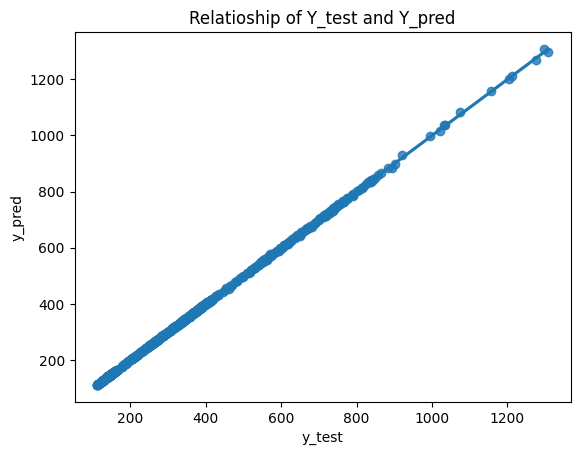

In [51]:
sns.regplot( x = y_test, y = y_pred , data = df)
plt.title('Relatioship of Y_test and Y_pred')
plt.ylabel('y_pred')
plt.xlabel('y_test')